### OpenCV
- 이미지나 동영상을 다룰 수 있는 라이브러리
- 실시간 영상처리에 중점을 둔 영상 처리 라이브러리

#### 예제-1

In [5]:
import cv2
capture = cv2.VideoCapture(0)
capture.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
while cv2.waitKey(33) < 0:
 ret, frame = capture.read()
 cv2.imshow("VideoFrame", frame)
capture.release()
cv2.destroyAllWindows()

#### 캡쳐 및 녹화 예제1

In [7]:
import cv2
cap = cv2.VideoCapture(0)
if cap.isOpened: # 성공적으로 열리면 트루 아니면 False
 file_path = 'record.avi' 
 fps = 30.0 
 fourcc = cv2.VideoWriter_fourcc(*'DIVX')
 width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
 height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
 size = (int(width), int(height))
 out = cv2.VideoWriter(file_path, fourcc, fps, size) 

 while True:
     ret, frame = cap.read()
     if ret:
         cv2.imshow('camera-recording',frame)
         out.write(frame) 
         if cv2.waitKey(int(1000/fps)) != -1:
             break
     else:
         print("no frame!")
         break
 out.release() 
else:
 print("can't open camera!")
cap.release()
cv2.destroyAllWindows()

### openCV는 BGR이미지 사용(Blue, Green, Red)(RGB아님)

#### ex

In [13]:
import cv2
image = cv2.imread("./data/cat.jpg", cv2.IMREAD_ANYCOLOR) # GRAYSCALE=> 흑백이미지로 나타남(흑백은 2차원 이미지), ANYCOLOR => 컬러이미지(컬러는 3차원 이미지)
print(image.shape)
cv2.imshow("img", image)
cv2.waitKey()
cv2.destroyAllWindows()

(448, 680, 3)


####  비디오 출력 예제

In [16]:
import cv2
capture = cv2.VideoCapture("./data/wildlife.mp4")
while cv2.waitKey(33) < 0:
 if capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT):
     capture.set(cv2.CAP_PROP_POS_FRAMES, 0) # 프레임의 끝에 도달하면 다시 프레임의 위치가 처음으로 돌아옴(즉, 계속 반복함)
 ret, frame = capture.read()
 cv2.imshow("wildlife", frame)
capture.release()
cv2.destroyAllWindows()

-------------------------------------------------------------------------


In [ ]:
import datetime
import cv2

In [ ]:
### import datetime
import cv2

capture = cv2.VideoCapture("./data/youquiz4.mp4")
fourcc = cv2.VideoWriter_fourcc (*'XVID')
record = False

while True:
    if (capture.get (cv2.CAP_PROP_POS_FRAMES) == capture.get (cv2.CAP_PROP_FRAME_COUNT)): #현재 프레임의 위치임
        capture.open("../data/youquiz4.mp4")
    ret, frame = capture.read()
    cv2.imshow("VideoFrame", frame)
    now = datetime.datetime.now().strftime ("%d %H-%M-%S")
    key = cv2.waitKey (33)
    print("key =>", key)
    # 27 : ESC, 49 : 숫자 1, 50 : 숫자 2, 51 : 숫자 3, esc = 종료
    if key == 27:
        break
    elif key == 49: # 숫자 1 => 화면캡쳐
        print('캡쳐')
        cv2.imwrite('./capture/'+str(now)+'.png',frame)
    elif key == 50: # 숫자 2=> 녹화 중
        print("녹화 시작")
        record = True
        video = cv2.VideoWriter("./capture/" + str(now) + ".avi", fourcc, 20.0,
                    (frame.shape[1], frame.shape[0]))
    elif key == 51: # 숫자 3 => 녹화중지 ( 녹화된 것이 capture 파일에 들어감)
        print("녹화 중지")
        record = False
        video.release()
        
    if record == True:
        print('녹화 중..')
        video.write(frame)
        
capture.release()
cv2.destroyAllWindows()


-----------------------------------------------------------------------------------------------
### 대칭

In [ ]:
#예제1

In [9]:
import cv2

src = cv2.imread("./data/cat.jpg", cv2.IMREAD_COLOR)
dst = cv2.flip(src, 0)
cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

--------------------------------------------------------------------------
다른거


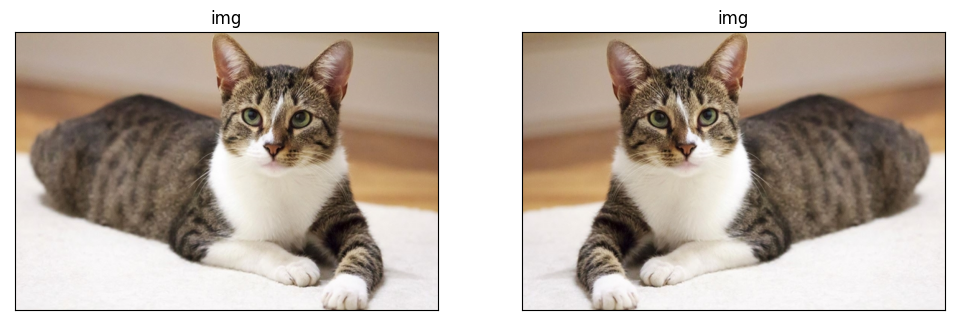

In [22]:
import cv2
import matplotlib.pyplot as plt

def img_show(title = 'image', img = None, figsize = (8,5)):
    plt.figure(figsize = figsize)
    
    if type(img) == list:
        if type(title) == list:
            titles = title
        else: 
            titles = []
            
            for i in range(len(img)):
                titles.append(title)
                
            for i in range(len(img)):
                if len(img[i].shape) <= 2:
                    rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
                else:
                     rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
                
                plt.subplot(1, len(img), i+1), plt.imshow(rgbImg)
                plt.title(titles[i])
                plt.xticks([]), plt.yticks([])
                
            plt.show()
    else:
        if len(img.shape) < 3:
                        rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
                rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
         
        
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()
        
src = cv2.imread('./data/cat.jpg', cv2.IMREAD_COLOR)
dst = cv2.flip(src, 1)
img_show('img',[src, dst], figsize = (12,5))




cv2.waitKey()
cv2.destroyAllWindows()

### 회전

In [ ]:
# 예제 1

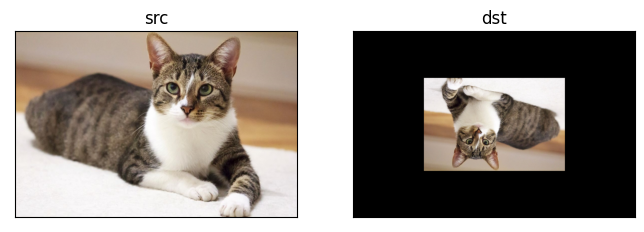

In [30]:
import cv2
import matplotlib.pyplot as plt

def img_show(title='image', img= None ,figsize=(8,5)):
    plt.figure(figsize=figsize)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <3:
                rgbImg = cv2.cvColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i],cv2.COLOR_BGR2RGB)

            # plt.subplot(len(img), 1, i+1)
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.CLOLOR_BGR2RGB)

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]),plt.yticks([])
        plt.show()

src = cv2.imread("./data/cat.jpg", cv2.IMREAD_COLOR)
height, width, channel = src.shape
matrix = cv2.getRotationMatrix2D((width/2, height/2), 180, 0.5) # 180 => 각도임// 0.5 => 사진이 차지하는 크기
dst = cv2.warpAffine(src, matrix, (width, height)) # warpAffine => 위치변환, 행렬변환을 시킴(실질적인 변환을 시킴)

img_show(["src","dst"], [src, dst], figsize = (8,4))

cv2.waitKey()
cv2.destroyAllWindows()


-------------------------------------------------------------------------------------------
## 확대 축소

In [2]:
# 예제 1
import cv2
import matplotlib.pyplot as plt

def img_show(title='image', img= None ,figsize=(8,5)):
    plt.figure(figsize=figsize)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <3:
                rgbImg = cv2.cvColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i],cv2.COLOR_BGR2RGB)

            # plt.subplot(len(img), 1, i+1)
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.CLOLOR_BGR2RGB)

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]),plt.yticks([])
        plt.show()
        

src = cv2.imread("./data/song_1.jpg", cv2.IMREAD_COLOR) 
height, width, channel = src.shape # 칼라 이므로 3차원 구조이다.
dst_pyrUp = cv2.pyrUp(src, dstsize=(width * 2, height * 2), borderType=cv2.BORDER_DEFAULT) # BORDER_DEFAULT => 외삽법 중 1
dst_pyrDown = cv2.pyrDown(src) 
 
cv2.imshow("src", src)
cv2.imshow("pyrUp", dst_pyrUp)
cv2.imshow("pyrDown", dst_pyrDown)
cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
# 예제 2 // 이미지만 달라짐
import cv2
import matplotlib.pyplot as plt

def img_show(title='image', img= None ,figsize=(8,5)):
    plt.figure(figsize=figsize)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <3:
                rgbImg = cv2.cvColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i],cv2.COLOR_BGR2RGB)

            # plt.subplot(len(img), 1, i+1)
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.CLOLOR_BGR2RGB)

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]),plt.yticks([])
        plt.show()
        

img = cv2.imread('./data/cat.jpg')
dst_pyrUp = cv2.pyrUp(img) # img x 4
dst_pyrDown = cv2.pyrDown(img) # img x 1/4
cv2.imshow('img', img)
cv2.imshow('pyrUp', dst_pyrUp)
cv2.imshow('pyrDown', dst_pyrDown)
cv2.waitKey(0)
cv2.destroyAllWindows()

-----------------------------------------------------------------------
#### 교재에는 없는 예제(확대/축소)

In [10]:
import cv2
import numpy as np

def img_show(title='image', img= None ,figsize=(8,5)):
    plt.figure(figsize=figsize)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <3:
                rgbImg = cv2.cvColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i],cv2.COLOR_BGR2RGB)

            # plt.subplot(len(img), 1, i+1)
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.CLOLOR_BGR2RGB)

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]),plt.yticks([])
        plt.show()
        

img = cv2.imread('./data/cat.jpg')
smaller = cv2.pyrDown(img)
bigger = cv2.pyrUp(smaller)
laplacian = cv2.subtract(img, bigger)
restored = bigger + laplacian
merged = np.hstack((img, laplacian, bigger, restored))
# img_show('Laplacian Pyramid', merged, (16,4))
# cv2.imshow('Laplacian Pyramid', merged)
cv2.imshow('img', img)
cv2.imshow('smaller', smaller)
cv2.imshow('bigger', bigger)
cv2.imshow('laplacian', laplacian)
cv2.imshow('restored', restored)
cv2.waitKey(0)
cv2.destroyAllWindows()

-------------------------------------------------------------------------------
## 크기조절

In [13]:
import cv2

src = cv2.imread("./data/cat.jpg", cv2.IMREAD_COLOR)

dst = cv2.resize(src, dsize=(800, 600), interpolation=cv2.INTER_LINEAR)
dst2 = cv2.resize(src, dsize=(0, 0), fx=0.3, fy=0.7, interpolation=cv2.INTER_AREA)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.imshow("dst2", dst2)
cv2.waitKey()
cv2.destroyAllWindows()

-------------------------------------------------------------------
### 교재에는 없는 예제
- pip install imutils 설치

이미지 사이즈 : (448, 680, 3)
이미지  dtype : uint8
이미지 Heigh : 448
이미지 Width : 680
이미지 전체 픽셀 개수 : 913920


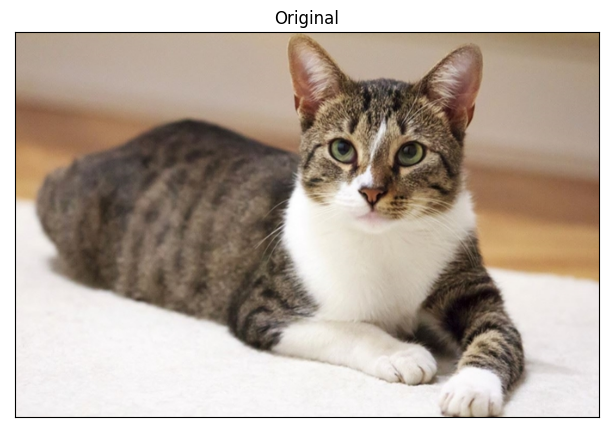

---------------------------
이미지 사이즈 : (131, 200, 3)
이미지  dtype : uint8
이미지 Heigh : 131
이미지 Width : 200
이미지 전체 픽셀 개수 : 78600


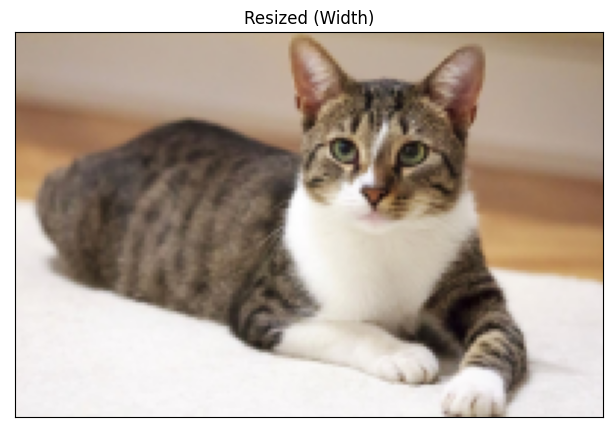

--------------------------
이미지 사이즈 : (100, 151, 3)
이미지  dtype : uint8
이미지 Heigh : 100
이미지 Width : 151
이미지 전체 픽셀 개수 : 45300


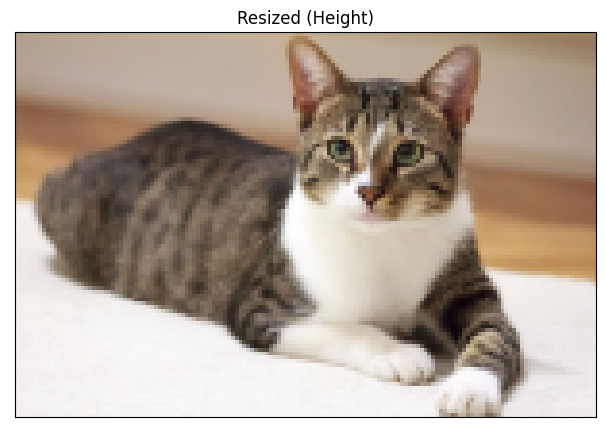

--------------------------
이미지 사이즈 : (65, 100, 3)
이미지  dtype : uint8
이미지 Heigh : 65
이미지 Width : 100
이미지 전체 픽셀 개수 : 19500


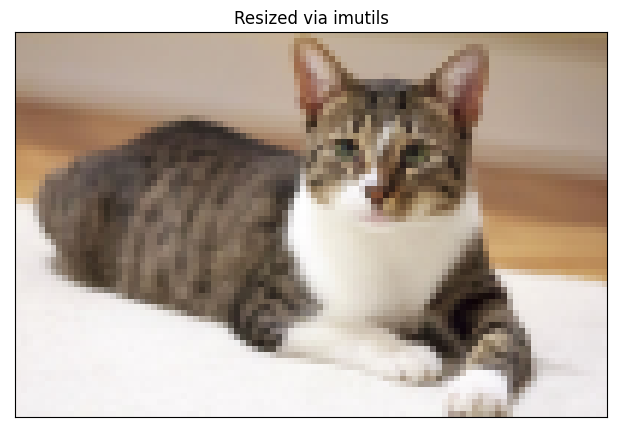

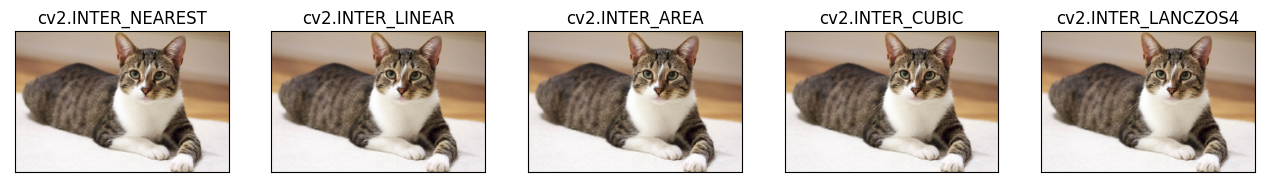

In [1]:
import cv2
import imutils
import matplotlib.pyplot as plt

def img_show(title='image', img= None ,figsize=(8,5)):
    plt.figure(figsize=figsize)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <3:
                rgbImg = cv2.cvColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i],cv2.COLOR_BGR2RGB)

            # plt.subplot(len(img), 1, i+1)
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]),plt.yticks([])
        plt.show()
        
def print_image_info(image):
    print('이미지 사이즈 : {}'.format(image.shape))
    print('이미지  dtype : {}'.format(image.dtype))
    print('이미지 Heigh : {}'.format(image.shape[0]))
    print('이미지 Width : {}'.format(image.shape[1]))
    print('이미지 전체 픽셀 개수 : {}'.format(image.size))
    
    
cv2_image = cv2.imread('./data/cat.jpg', cv2.IMREAD_COLOR)
print_image_info(cv2_image)
img_show(['Original'], [cv2_image])
print('---------------------------')


width = 200
aspect_ratio = float(width) / cv2_image.shape[1]
dsize = (width, int(cv2_image.shape[0]* aspect_ratio))
resized = cv2.resize(cv2_image, dsize, interpolation = cv2.INTER_AREA)
print_image_info(resized)
img_show('Resized (Width)', resized)
# cv2.imshow('Resized(Width)', resized)
print('--------------------------')

height=100
aspect_ratio = float(height) / cv2_image.shape[0]
dsize = (int(cv2_image.shape[1]* aspect_ratio), height)
resized = cv2.resize(cv2_image, dsize, interpolation = cv2.INTER_AREA)
print_image_info(resized)
img_show('Resized (Height)', resized)
# cv2.imshow('Resized(Height)', resized)
print('--------------------------')

resized = imutils.resize(cv2_image, width = 100)
print_image_info(resized)
img_show('Resized via imutils', resized)

methods = [('cv2.INTER_NEAREST', cv2.INTER_NEAREST),
          ('cv2.INTER_LINEAR', cv2.INTER_LINEAR),
          ('cv2.INTER_AREA', cv2.INTER_AREA),
          ('cv2.INTER_CUBIC', cv2.INTER_CUBIC),
          ('cv2.INTER_LANCZOS4', cv2.INTER_LANCZOS4),
          
          ]

image_label = []
image_list = []
for (name, method) in methods:
    image_label.append(name)
    resized = imutils.resize(cv2_image, width = cv2_image.shape[1] * 3, inter = method)
    image_list.append(resized)
    
img_show(image_label, image_list, figsize = (16, 10))

## 자르기
- 예제1


In [3]:
import cv2
src = cv2.imread("./data/chess.jpg", cv2.IMREAD_COLOR)
dst = src[100:600, 200:700].copy()

src = cv2.resize(src,(0,0),fx = 0.7, fy = 0.7, interpolation = cv2.INTER_AREA)
src = cv2.resize(dst,(0,0),fx = 0.7, fy = 0.7, interpolation = cv2.INTER_AREA)


cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 색상 공간 변환(Convert Color)

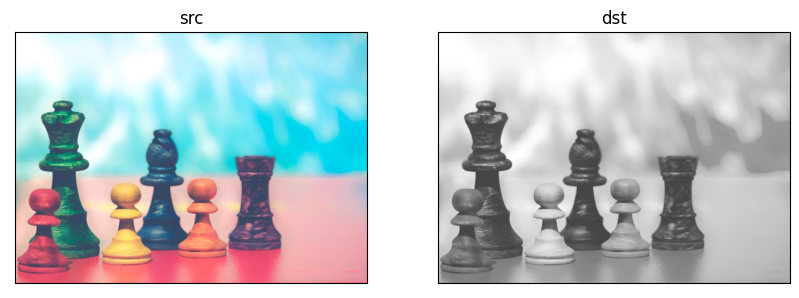

In [10]:
import cv2

import matplotlib.pyplot as plt

def img_show(title='image', img= None ,figsize=(8,5)):
    plt.figure(figsize=figsize)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <3:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i],cv2.COLOR_BGR2RGB)

            # plt.subplot(len(img), 1, i+1)
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]),plt.yticks([])
        plt.show()


src = cv2.imread("./data/chess.jpg", cv2.IMREAD_COLOR)
dst = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
dst2 = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
img_show(['src', 'dst'], [src,dst],(10,5))
# cv2.imshow("src", src)
# cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 이진화(눈여겨볼 중요한 내용임)

127.0


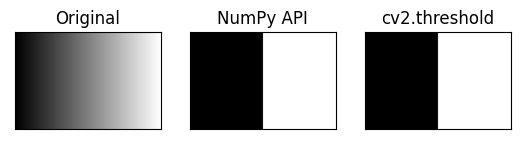

In [11]:
import cv2
import numpy as np
import matplotlib.pylab as plt
img = cv2.imread('./data/gray_gradient.jpg', cv2.IMREAD_GRAYSCALE)
thresh_np = np.zeros_like(img)
thresh_np[ img > 127] = 255 # 127 => 이 부분의 숫자는 이미지 색상 값이다.
ret, thresh_cv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
print(ret)
imgs = {'Original': img, 'NumPy API':thresh_np, 'cv2.threshold': thresh_cv}
for i , (key, value) in enumerate(imgs.items()):
     plt.subplot(1, 3, i+1)
     plt.title(key)
     plt.imshow(value, cmap='gray')
     plt.xticks([]); plt.yticks([])
plt.show()

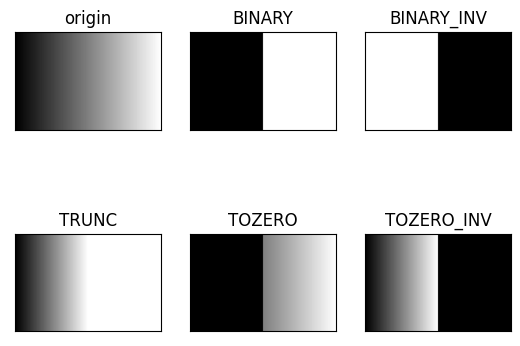

In [14]:
# 예제2

import cv2
import numpy as np
import matplotlib.pylab as plt
img = cv2.imread('./data/gray_gradient.jpg', cv2.IMREAD_GRAYSCALE) # THRESH => 어떻게 두는지에 따라 결과를 보여준다.
_, t_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, t_bininv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, t_truc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, t_2zr = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, t_2zrinv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
imgs = {'origin': img, 'BINARY': t_bin, 'BINARY_INV': t_bininv, 'TRUNC': t_truc, 'TOZERO': t_2zr, 
'TOZERO_INV': t_2zrinv}
for i, (key, value) in enumerate(imgs.items()):
     plt.subplot(2, 3, i + 1)
     plt.title(key)
     plt.imshow(value, cmap='gray')
     plt.xticks([]);
     plt.yticks([])
plt.show()


--------------------------------------------------------------------------
### 또 교재에 없는 내용

otsu threshold 131.0


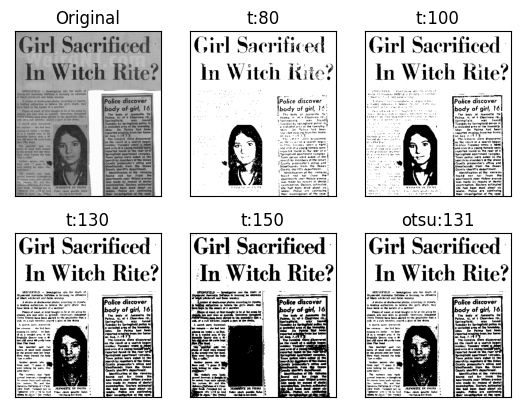

In [18]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('./data/scaned_paper.jpg', cv2.IMREAD_GRAYSCALE)
_, t_80 = cv2.threshold(img, 80, 255, cv2.THRESH_BINARY)
_, t_100 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
_, t_130 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)
_, t_150 = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)
# 오츠의 알고리즘은 임계값을 임의로 정해 픽셀을 두 부류로 나누고, 두 부류의 명암 분포를 구하는 작업을 반복한다.
# 모든 경우의 수 중에서 두 부류의 명암 분포가 가장 균일할 때의 임계값을 선택한다.
t, t_otsu = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print('otsu threshold',t)

imgs = {'Original': img, 't:80':t_80, 't:100':t_100, 't:130':t_130, 't:150':t_150, 'otsu:%d'%t: t_otsu}
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(2,3,i+1)
    plt.title(key)
    plt.imshow(value, cmap = 'gray')
    plt.xticks([]); plt.yticks([])
    
plt.show()

## 적응형 이진화(상황에 따라 이진화를 적정하게 정하겠다)

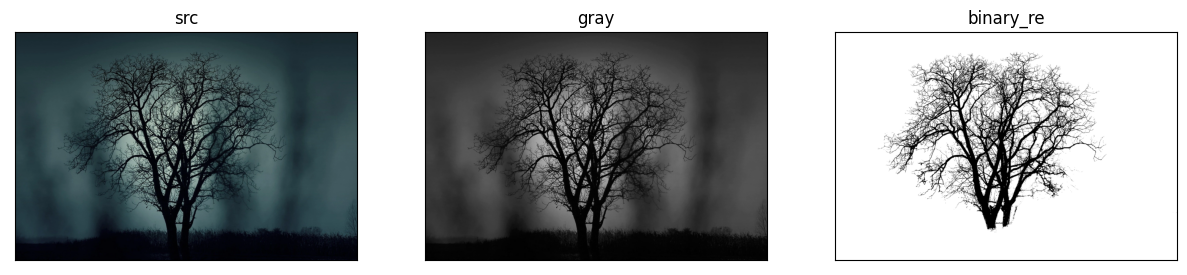

In [21]:
# 예제 1
import cv2

import matplotlib.pyplot as plt

def img_show(title='image', img= None ,figsize=(8,5)):
    plt.figure(figsize=figsize)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <3:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i],cv2.COLOR_BGR2RGB)

            # plt.subplot(len(img), 1, i+1)
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]),plt.yticks([])
        plt.show()
        
        
        
src = cv2.imread("./data/tree.jpg")
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 467, 37)
binary_re = cv2.resize(binary, dsize=(0, 0), fx=0.7, fy=0.7, interpolation=cv2.INTER_LINEAR)
img_show(['src', 'gray', 'binary_re'], [src, gray, binary_re], (15,5))
# cv2.imshow("binary", binary_re)
cv2.waitKey(0)
cv2.destroyAllWindows()

----------------------------------------------------------------------------

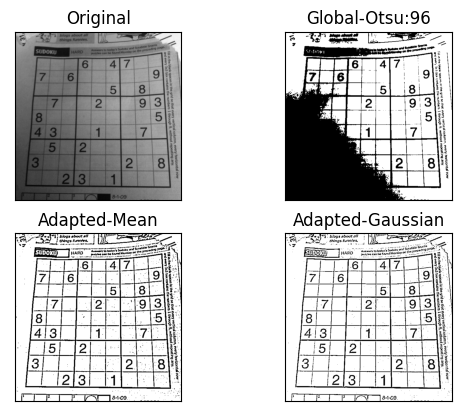

In [23]:
# 트레쉬 홀더를 어떤 것을 사용하는지에 따라 비교하는 문제이다.
import cv2
import matplotlib.pyplot as plt
import numpy as np

blk_size = 9
C=5
img = cv2.imread('./data/sudoku.png', cv2. IMREAD_GRAYSCALE)

ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blk_size, C) # MEAN_C => 산술평균
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blk_size, C)
imgs = {'Original': img, 'Global-Otsu:%d'%ret:th1, 'Adapted-Mean':th2, 'Adapted-Gaussian': th3}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v, 'gray')
    plt.xticks([]),plt.yticks([])

plt.show()

## 흐림효과(blur)

In [31]:
# 평균블러
import cv2

src = cv2.imread("./data/cat.jpg", cv2.IMREAD_COLOR)

for ksize in (3, 5, 7, 11): # 커널 사이즈 분류
     dst = cv2.blur(src, (ksize, ksize), 0)
     desc = 'Mean: {}x{}'.format(ksize, ksize)
     cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, 255, 1, cv2.LINE_AA) # (10, 30) => 출력할 위치, FONT_HERSHEY_SIMPLEX => 글 꼴
     cv2.imshow("dst", dst)
     cv2.waitKey()
cv2.destroyAllWindows()

In [33]:
# 가우시안 블러 ( 중심점일 수록 값이 커지고 멀어질 수록 작아짐)

import cv2

src = cv2.imread("./data/cat.jpg", cv2.IMREAD_COLOR)
for ksize in (3, 5, 7, 11):
# dst = cv2.GaussianBlur(src, ksize, sigmaX, dst = None, sigmaY = Nonem borderType = None)
# src =   입력 이미지
# ksize = 가우시안 커널 크기
# sigmaX = x방향 sigma
# sigmaY = y방향 sigma, 0이면 sigmaX와 같게 설정.
# borderType: 가장자리 픽셀 어쩌구저쩌구

     dst = cv2.GaussianBlur(src, (ksize, ksize), 0)
     desc = 'Mean: {}x{}'.format(ksize, ksize)
     cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, 255, 1, cv2.LINE_AA)
     cv2.imshow("dst", dst)
     cv2.waitKey()
cv2.destroyAllWindows()

-----------------------------------------------------

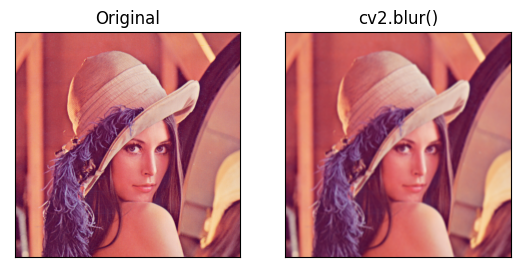

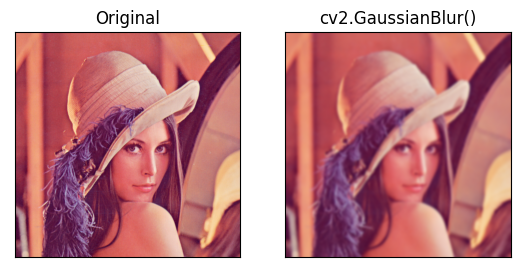

In [36]:
import matplotlib.pylab as plt
import cv2

image = cv2.imread('./data/Lenna.png')

def plotFigures(original_image, blurred_image, title):
    plt.figureffigsize=(10,5)
    plt.subplot(121)
    plt.imshow(cv2.cvtColor (original_image, cv2.COLOR_BGR2RGB) )
    plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt. subplot (122)
    plt.imshow(cv2.cvtColor (blurred_image, cv2.COLOR_BGR2RGB) )
    plt.title(title)
    plt.xticks([]), plt.yticks([])
    plt.show()

blur = cv2.blur(image, (5,5))
plotFigures(image, blur, "cv2.blur()")

gaussian = cv2.GaussianBlur (image, (15,15) ,0)
plotFigures(image, gaussian, "cv2.GaussianBlur()")

## 가장자리 검출(눈여겨 봐야할 예제)

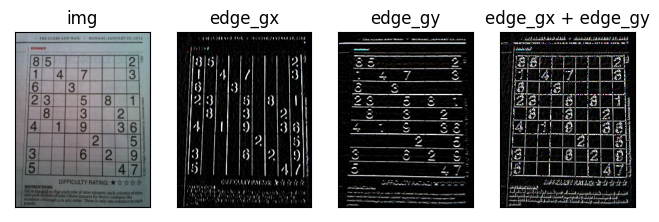

In [44]:
import cv2
import numpy as np

img = cv2.imread("./data/sudoku.jpg")
gx_k = np.array([[-1,0,1], [-2,0,2],[-1,0,1]]) # x축 방향에 대한 커널
gy_k = np.array([[-1,-2,-1],[0,0,0], [1,2,1]]) # y 축 방향에 대한 커널

edge_gx = cv2.filter2D(img, -1, gx_k) # filter2D
edge_gy = cv2.filter2D(img, -1, gy_k)

img_show(['img', 'edge_gx', 'edge_gy','edge_gx + edge_gy'],[img, edge_gx, edge_gy, edge_gx+edge_gy])
# cv2.imshow('sobel:edge_gx', edge_gx)
# cv2.imshow('sobel:edge_gy', edge_gy)
# cv2.imshow('sobel:edge_gx+edge_gy', edge_gx+edge_gy)
cv2.waitKey(0)
cv2.destroyAllWindows()